# Quiz 3

#### Alunos: Edson Roteia Araujo Junior e João Pedro Moreira Ferreira

### Input Image

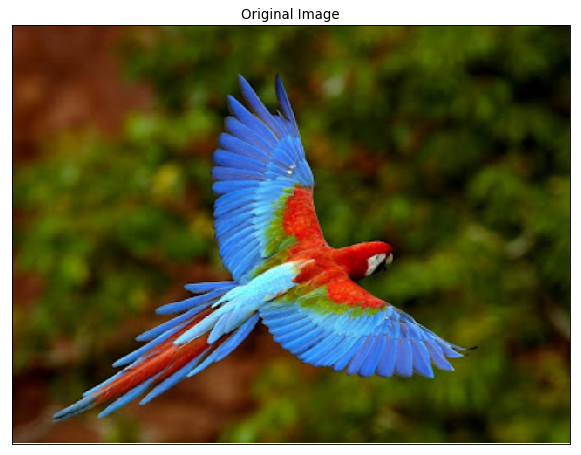

In [1]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

original = cv2.imread('imgs/parrot.jpg')
img = cv2.cvtColor(cv2.resize(original,(640,480)),cv2.COLOR_BGR2RGB)
fig=plt.figure(figsize=(9, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.imshow(img)
plt.xticks([]),plt.yticks([])
plt.title('Original Image') 
plt.show()

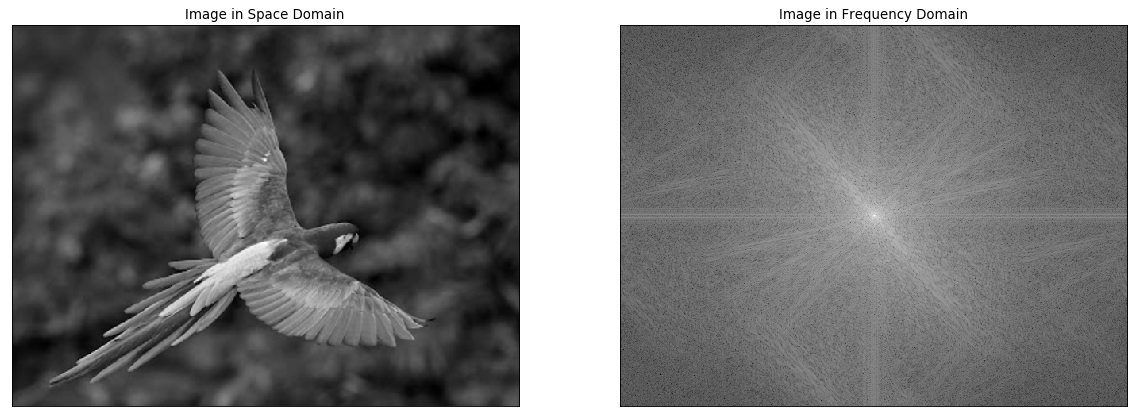

In [2]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

img_2 = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
dft = cv2.dft(np.float32(img_2),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

plt.subplot(121),plt.imshow(img_2, cmap = 'gray')
plt.title('Image in Space Domain'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Image in Frequency Domain'), plt.xticks([]), plt.yticks([])
plt.show()

## Our Low-pass Filter

In [3]:
height, width = magnitude_spectrum.shape
n = 2
D_0 = 128

H = []
for u in range(int(-height/2), int(height/2)):
    H_line = []
    for v in range(int(-width/2), int(width/2)):
        H_line.append(1 / (1 + (np.sqrt(u ** 2 + v ** 2) / D_0) ** (2 * n)))
    H.append(H_line)
H = np.array(H)

[2 2 2]
[2 2 2]
[255 255 255]
921600


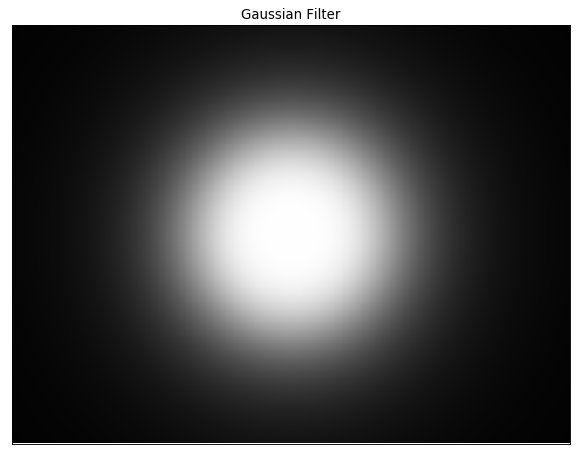

In [ ]:
fig=plt.figure(figsize=(9, 8), dpi= 80, facecolor='w', edgecolor='k')
H_2 = np.zeros(img.shape).astype(np.uint8)
H_2[:,:,0] = (H * 255).astype(np.uint8)
H_2[:,:,1] = (H * 255).astype(np.uint8)
H_2[:,:,2] = (H * 255).astype(np.uint8)
print(H_2[-1][-1])
print(H_2[0][0])
print(H_2[240][320])
print(np.count_nonzero(H_2))

plt.imshow(H_2)#[200:280, 280:360])
plt.xticks([]),plt.yticks([])
plt.title('Gaussian Filter') 
plt.show()

In [ ]:
filtered_freq = np.multiply(magnitude_spectrum, H)
filtered_space = np.fft.ifft2(filtered_freq)
print("Done")
plt.subplot(121),plt.imshow(filtered_freq, cmap = 'gray')
plt.title('Filtered Image in Frequency Domain'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(filtered_space, cmap = 'gray')
plt.title('Filtered Image in Space Domain'), plt.xticks([]), plt.yticks([])
plt.show()

### Image after corruption

### Our Filter

### Image after filters (Ours, Gaussian, Bilinear)

In [ ]:
##ours
ours = cv2.filter2D(img,-1,kernel)

In [ ]:
###gaussian
gaussian = cv2.GaussianBlur(img,(5,5),0)

In [ ]:
###bilateral
bilateral = cv2.bilateralFilter(img,9,75,75)

In [ ]:
###show images
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

plt.subplot(131),plt.imshow(img)
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(gaussian)
plt.title('Gaussian'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(bilateral)
plt.title('Bilateral'), plt.xticks([]), plt.yticks([])
plt.show()

### 10 images with medium ISO

In [ ]:
images_name = ['imgs/0.jpg','imgs/1.jpg','imgs/2.jpg','imgs/3.jpg','imgs/4.jpg','imgs/5.jpg','imgs/6.jpg',
               'imgs/7.jpg','imgs/8.jpg','imgs/9.jpg']#,'imgs/10.jpg']
images = []
for img_name in images_name:
    images.append(cv2.cvtColor(cv2.resize(cv2.imread(img_name),(640,480)),cv2.COLOR_BGR2GRAY))

In [ ]:
####AVERAGE IMAGE
average_img = np.mean(images,axis=0)
average_img = average_img.astype(int)
# average_img_rgb = average_img[:,:,::-1]
plt.imshow(average_img,cmap='gray')
plt.xticks([]),plt.yticks([])
plt.title('Average Image') 
plt.show()

In [ ]:
####STANDARD DEVIATION
std_img = np.sqrt(np.mean(abs(np.array(images) - average_img)**2,axis=0))
std_img = std_img.astype(int)
plt.imshow(std_img,cmap='gray')
plt.xticks([]),plt.yticks([])
plt.title('Standard Deviation Image') 
plt.show()

In [ ]:
####AVERAGE NOISE
# average_img.shape
noise = (abs((np.array(images)-average_img))-std_img)
noise[noise < 0] = 0
noise = np.mean(noise,axis=0)
plt.imshow(noise,cmap='gray')
plt.xticks([]),plt.yticks([])
plt.title('Average Noise Image') 
plt.show()

In [ ]:
####FILTERING

In [ ]:
####all images
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

plt.subplot(131),plt.imshow(average_img,cmap='gray')
plt.title('Average Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(std_img,cmap='gray')
plt.title('STD Image'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(noise,cmap='gray')
plt.title('Average Noise Image'), plt.xticks([]), plt.yticks([])
plt.show()